In [1]:
# Import librairies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Après avoir fait les import nécessaires, on écrit les différentes fonctions qu'on utiiseras:
_**plot_all_logs**_ : affiche les graphes de comparaisons du loss et de l'accuracy de tous les modèles avec la légende.

_**add_layers_linear**_ : ajoute les couches pour le modèle linéaire.

_**add_layers_pcm**_ : ajoute les couches pour le modèle perceptron linéaire

_**build_train_and_model**_ : complète le modèle avec la dernière couches et compile ce dernier aant de le lancer avec un nombre époques nbEpochs.

In [10]:
learning_rate = 0.03

#Pour l'affichage
def plot_all_logs(all_logs):
    # Loss
    for logs in all_logs:
        y_coords = logs[0].history["loss"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Loss")

    plt.show()
    
        # accuracy
    for logs in all_logs:
        y_coords = logs[0].history["categorical_accuracy"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Accuracy")
        
    plt.show()


In [4]:
def build_and_train_model(build_layers, x_train, y_train, x_test, y_test):
    model = keras.models.Sequential()
    build_layers(model)
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation="sigmoid"))

    model.compile(
        loss=keras.losses.mse,  # calcul l'erreur; absolute difference loss for linear model
        optimizer=keras.optimizers.SGD(learning_rate),  # minimise l'erreur
        metrics=keras.metrics.categorical_accuracy
    )

    logs = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)
    model.summary()
    return logs


In [5]:

def add_layers_linear(model:keras.models.Sequential) :
    model.add(keras.layers.Flatten())

def add_layers_pmc(model:keras.models.Sequential) :
    #cette fonction ajoute les layers qui correspondent à un perceptron multicouche choix arbitraire du nombres de neuronne
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=keras.activations.sigmoid))
    model.add(keras.layers.Dense(128, activation=keras.activations.relu))


Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0902 - categorical_accuracy: 0.2047 - val_loss: 0.0873 - val_categorical_accuracy: 0.2749
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0860 - categorical_accuracy: 0.3011 - val_loss: 0.0848 - val_categorical_accuracy: 0.3280
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0843 - categorical_accuracy: 0.3307 - val_loss: 0.0835 - val_categorical_accuracy: 0.3385
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0833 - categorical_accuracy: 0.3462 - val_loss: 0.0828 - val_categorical_accuracy: 0.3481
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0827 - categorical_accuracy: 0.3548 - val_loss: 0.0823 - val_categorical_accuracy: 0.3545
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0822 - categorical_accuracy: 0.3617 - val_loss: 0.0818 - val_categorical_accuracy:

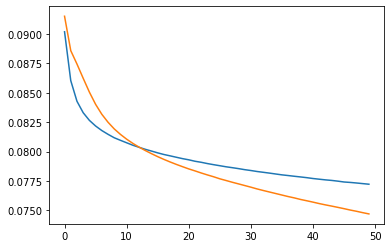

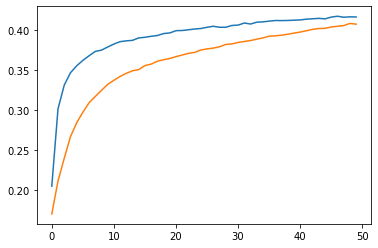

In [6]:
if __name__ == "__main__":
    # Charge les données
    (X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

    # Noramalisation des données (Flatten)
    X_train = X_train / 255.0
    Y_train = keras.utils.to_categorical(Y_train, 10)

    X_test = X_test / 255.0
    Y_test = keras.utils.to_categorical(Y_test, 10)

    all_logs = [
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test),"modèle perceptron multi-couche")
        ]
 

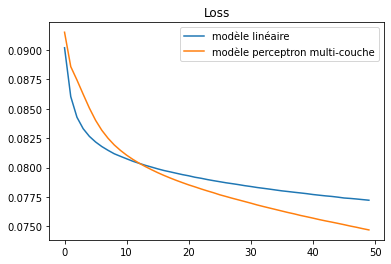

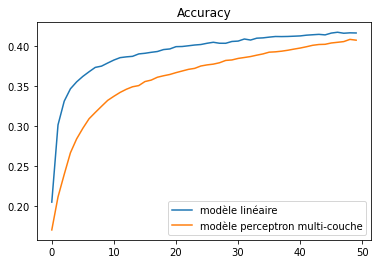

In [11]:
   plot_all_logs(all_logs)